# EXPLICABILIDAD DEL MODELO

In [1]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el conjunto de datos
filename = "../data/base_preprocesamiento.csv"
data = pd.read_csv(filename)

In [3]:
data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,25,1,200.0,0,INTERNET,11.234264,other,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,2,0,200.0,0,INTERNET,5.329387,other,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0


In [4]:
#Cargamos el conjunto de datos
filename1 = "../data/X_train_sm.csv"
filename2 = "../data/X_test.csv"
filename3 = "../data/y_train_sm.csv"
filename4 = "../data/y_test.csv"


X_train_sm = pd.read_csv(filename1)
X_test = pd.read_csv(filename2)
y_train_sm = pd.read_csv(filename3)
y_test = pd.read_csv(filename4)


In [5]:
X_train_sm.head(10)

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,velocity_24h,date_of_birth_distinct_emails_4w,credit_risk_score,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows
0,0.900000,0.690510,-1,40,30,0.004107,-1.355689,3306.413894,5,103,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
1,0.900000,0.825866,-1,195,20,0.024639,29.506247,4800.556838,9,147,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.200000,0.826324,-1,42,70,2.935605,49.016864,5500.005209,7,89,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
3,0.400000,0.832470,-1,139,50,0.015175,-1.288581,2938.170621,13,132,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
4,0.790885,0.832771,-1,106,30,0.022452,-0.932661,2159.793280,5,235,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.545573,0.454427
5,0.900000,0.084951,28,16,20,0.012293,-1.106157,3042.034054,13,134,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
6,0.683608,0.658400,-1,116,48,0.016049,-1.138234,4885.131245,8,219,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
7,0.400000,0.859362,-1,72,50,0.003491,39.777214,5885.390385,8,149,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
8,0.887965,0.257756,-1,90,57,0.007803,-1.107164,6938.704696,2,186,...,0.120352,0.0,0.0,0.0,0.0,0.0,0.0,0.879648,0.000000,0.120352
9,0.326313,0.186245,-1,78,33,0.016323,-1.101831,3840.844936,2,76,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.377188,0.622812


### IMPORTAMOS EL MODELO DEL FICHERO

In [10]:
import pickle

In [12]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
best_CART = pickle.load(open('../models/best_CART.pkl','rb'))

In [13]:
# verifico que el objeto se cargó correctamente
best_CART

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

### EXPLICABILIDAD DEL MODELO

In [14]:
import shap

In [15]:
shap.initjs()

In [16]:
explainer = shap.TreeExplainer(best_CART,X_train_sm)

In [17]:
shap_values = explainer.shap_values(X_test)

 99%|===================| 394531/400000 [01:16<00:01]        

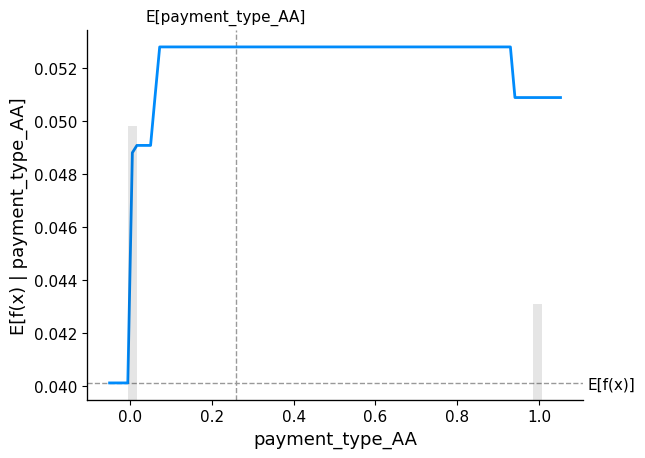

In [18]:
shap.partial_dependence_plot(
    "payment_type_AA",
    best_CART.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [19]:
shap_values

array([[[ 0.00136874, -0.00136874],
        [ 0.00763097, -0.00763097],
        [-0.00752276,  0.00752276],
        ...,
        [-0.00377142,  0.00377142],
        [ 0.06516055, -0.06516055],
        [ 0.00882744, -0.00882744]],

       [[-0.00132772,  0.00132772],
        [ 0.00316683, -0.00316683],
        [-0.01101809,  0.01101809],
        ...,
        [-0.0034002 ,  0.0034002 ],
        [-0.02231725,  0.02231725],
        [ 0.00555104, -0.00555104]],

       [[ 0.00044683, -0.00044683],
        [ 0.00169182, -0.00169183],
        [-0.0157521 ,  0.0157521 ],
        ...,
        [-0.0034002 ,  0.0034002 ],
        [-0.00592025,  0.00592025],
        [ 0.00509185, -0.00509185]],

       ...,

       [[-0.00106052,  0.00106052],
        [-0.00046789,  0.00046789],
        [-0.01316098,  0.01316098],
        ...,
        [-0.00278606,  0.00278606],
        [-0.02650898,  0.02650898],
        [ 0.0026982 , -0.0026982 ]],

       [[-0.00031856,  0.00031856],
        [ 0.00481662, -0.00

In [20]:
shap_values.shape

(200000, 45, 2)

In [21]:
filas=200000
columnas=45
matriz=np.empty((filas,columnas))
for i in range(filas):
    for j in range(columnas):
        matriz[i,j] = shap_values[i][:,0][j]

In [22]:
matriz.shape

(200000, 45)

In [23]:
shap_values[0][:,0]

array([ 1.36874348e-03,  7.63097300e-03, -7.52275564e-03, -3.29645122e-04,
       -4.37499217e-03,  4.34106588e-05,  2.39268825e-03, -3.06971371e-04,
        9.62715596e-06,  1.17791258e-05,  0.00000000e+00, -2.03274862e-02,
        5.38955848e-04, -1.91975273e-02, -8.83846283e-04,  3.73651944e-04,
        0.00000000e+00, -1.68879563e-05, -3.80165721e-02,  0.00000000e+00,
        1.44145363e-03,  1.65418218e-02, -6.24907353e-03,  6.53513427e-02,
       -1.45940036e-04,  0.00000000e+00, -8.39849603e-03,  4.23704608e-02,
        1.33275017e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.14204446e-04, -1.18225561e-02,  7.87077424e-02,
        0.00000000e+00, -1.42496249e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.59137818e-03, -3.77142046e-03,  6.51605486e-02,
        8.82743809e-03])

In [394]:
shap_values[1][:,0]

array([ 1.77309709e-04,  6.18770821e-03,  1.24679660e-02, -3.08536012e-04,
        1.72468092e-03, -1.73823908e-05, -9.09634616e-03,  9.74195078e-06,
       -1.85250007e-04,  6.35357073e-04, -8.45956150e-05, -1.57877116e-03,
        4.11353027e-05, -9.59711305e-03, -2.43027598e-03,  2.78811436e-05,
        0.00000000e+00, -4.31341231e-04,  4.68654695e-02,  0.00000000e+00,
       -1.10381955e-03,  5.63972312e-02, -3.01309910e-02, -6.23069420e-03,
       -9.40088021e-03,  0.00000000e+00, -5.61737437e-03,  1.00856779e-03,
        2.72063602e-03,  0.00000000e+00,  6.60676062e-04,  0.00000000e+00,
        0.00000000e+00,  9.07523426e-02, -1.58348203e-01,  1.79042860e-01,
        0.00000000e+00,  5.71823455e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.03231392e-02,  2.45991359e-04,  1.73705169e-03,
        1.14984059e-02])

In [24]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[0,:])

In [25]:
shap.force_plot(explainer.expected_value[0], shap_values[33][:,0], X_test.iloc[33, :])

In [29]:
shap.force_plot(explainer.expected_value[0], shap_values[48][:,0], X_test.iloc[48, :])

In [27]:
shap.force_plot(explainer.expected_value[0], matriz[:100,:], features=X_test.iloc[:100, :])

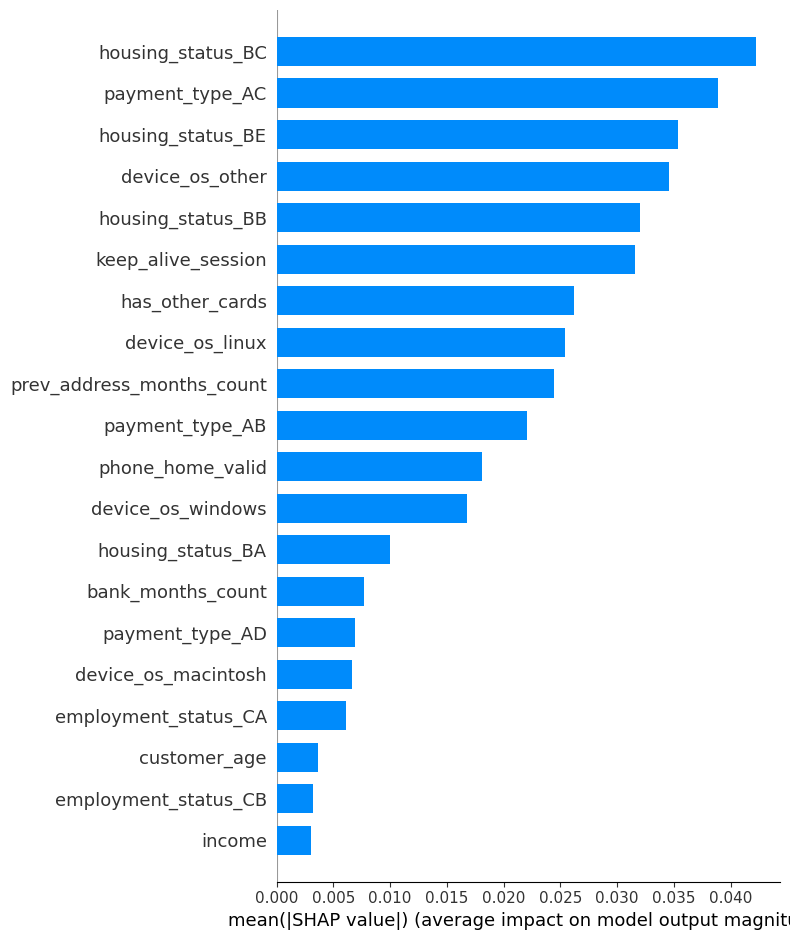

In [30]:
shap.summary_plot(matriz, X_test,plot_type='bar')

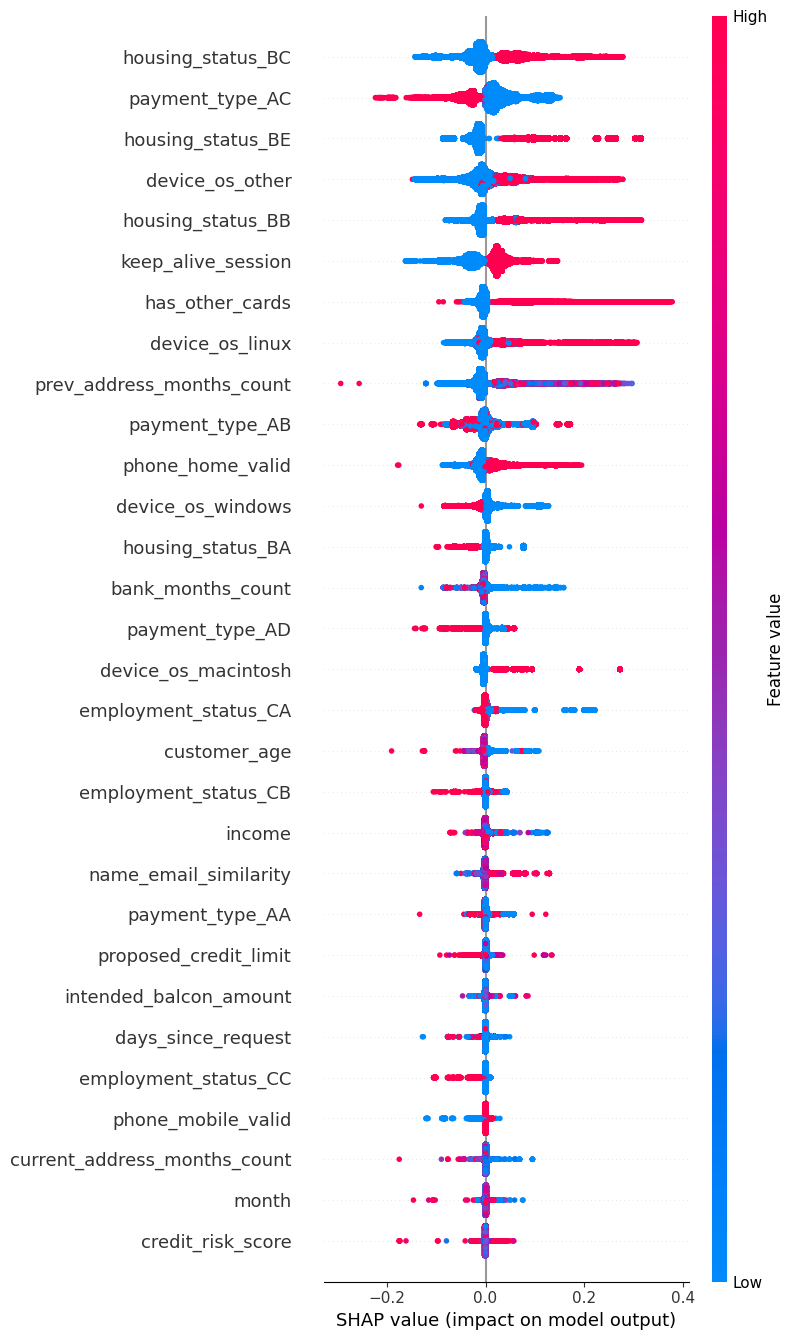

In [31]:
shap.summary_plot(matriz, features=X_test, max_display=30)

In [32]:
y_proba = best_CART.predict_proba(X_test)

In [33]:
y_proba

array([[9.79327701e-01, 2.06722991e-02],
       [9.90166967e-01, 9.83303315e-03],
       [9.90166967e-01, 9.83303315e-03],
       ...,
       [9.28086839e-01, 7.19131615e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.99130624e-01, 8.69376223e-04]])

In [34]:
y_pred_proba = y_proba[:, 1]

In [35]:
y_pred_proba

array([0.0206723 , 0.00983303, 0.00983303, ..., 0.07191316, 0.        ,
       0.00086938])

In [37]:
df_proba = pd.concat([pd.Series(y_pred_proba),pd.Series(y_test.reset_index(drop=True))], axis=1)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [38]:
df_proba.describe().T

NameError: name 'df_proba' is not defined

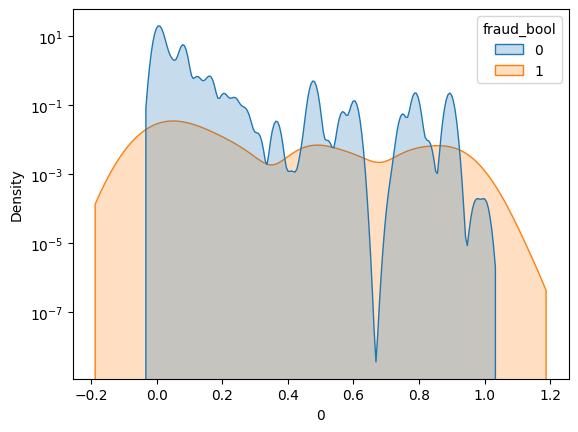

In [249]:
sns.kdeplot(data=df_proba,x=0,hue='fraud_bool',fill=True)
plt.yscale('log')  